In [1]:
from brian2 import *

---
## Thomas Stone's Central Complex
[link](https://github.com/tomish/brian-cx/blob/master/cx_simple.py)

Simple model of CX

In [2]:
start_scope()

taum = 20 * ms             # membrane time constant
taue = 5 * ms              # excitatory synaptic time constant
taui = 10 * ms             # inhibitory synaptic time constant
Vt = -50 * mV              # spike threshold
Vr = -60 * mV              # reset value
El = -49 * mV              # resting potential
we = (60 * 0.27 / 10) * mV # excitatory synaptic weight
wi = (20 * 4.5 / 10) * mV  # inhibitory synaptic weight

n = 40

eqs = Equations('''
      dV/dt  = (ge - gi - (V - El)) / taum : volt
      dge/dt = -ge/taue         : volt
      dgi/dt = -gi/taui         : volt
      ''')

threshold = "V > Vt"
reset = "V = Vr"

# spiketimes = [(0, 1 * ms),(0, 10 * ms)]
# Convert to Brian2
spike_indices = [0, 1]
spike_times = [1, 10] * ms

G_TL2 = SpikeGeneratorGroup(2, spike_indices, spike_times)
G_CL1a = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_CL1b = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_TB1 = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_CPU1 = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')

# C_LAL_CBL_1 = Connection(G_TL2, G_CL1a, 'ge')
# C_CBL_PB = Connection(G_CL1a, G_TB1, 'ge', weight=we)
# C_PB_PB_1 = Connection(G_TB1, G_TB1, 'gi', weight=wi)
# C_PB_CBL = Connection(G_TB1, G_CL1b, 'gi', weight=wi)
# C_PB_CBL = Connection(G_CL1b, G_CL1a, 'gi', weight=wi)
# Convert to Brian2
C_LAL_CBL_1 = Synapses(G_TL2, G_CL1a, 'w : siemens', on_pre='ge += we')
C_LAL_CBL_1.connect()
C_CBL_PB = Synapses(G_CL1a, G_TB1, 'w : siemens', on_pre='ge += we')
C_CBL_PB.connect()
C_PB_PB_1 = Synapses(G_TB1, G_TB1, 'w : siemens', on_pre='gi += wi')
C_PB_PB_1.connect()
C_PB_CBL = Synapses(G_TB1, G_CL1b, 'w : siemens', on_pre='gi += wi')
C_PB_CBL.connect()
C_PB_CBL = Synapses(G_CL1b, G_CL1a, 'w : siemens', on_pre='gi += wi')
C_PB_CBL.connect()

M_TB1_spikes = SpikeMonitor(G_TB1)
MV = StateMonitor(G_TB1, 'V', record=True)
Mge = StateMonitor(G_TB1, 'ge', record=True)
Mgi = StateMonitor(G_TB1, 'gi', record=True)

In [3]:
run(1000 * ms)

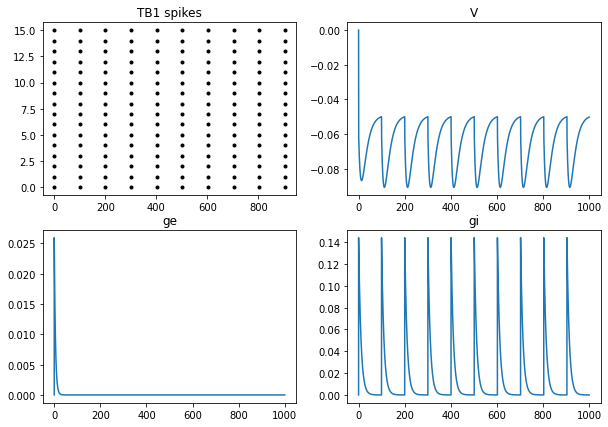

In [7]:
figure(figsize=(10,7))
#plotting spikes of TB 1 cells on raster plot.
subplot(2,2,1)
title('TB1 spikes')
plot(M_TB1_spikes.t/ms, M_TB1_spikes.i, '.k')

#observation_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
observation_list = [0]

#plotting voltage on TB1 cells
subplot(2,2,2)
title('V')
for i in observation_list:
    plot(MV.t/ms, MV.V[i])

subplot(2,2,3)
title('ge')
for i in observation_list:
    #plot(Mge.times / ms, Mge[i] / mV)
    plot(Mge.t/ms, Mge.ge[i])

subplot(2,2,4)
title('gi')
for i in observation_list:
    #plot(Mge.times / ms, Mgi[i] / mV)
    plot(Mge.t/ms, Mgi.gi[i])

show()

---
## More complex model

In [42]:
start_scope()

taum = 20 * ms             # membrane time constant
taue = 5 * ms              # excitatory synaptic time constant
taui = 10 * ms             # inhibitory synaptic time constant
Vt = -50 * mV              # spike threshold
Vr = -60 * mV              # reset value
El = -49 * mV              # resting potential
we = (60 * 0.27 / 10) * mV # excitatory synaptic weight
wi = (20 * 4.5 / 10) * mV  # inhibitory synaptic weight

we = 1.5 * mV
wi = 4.5 * mV

n = 40

# Izhikevich model
a = 0.02 / ms 
b = 0.2 / ms
c = Vr
d = 8 * mV/ms

eqs = '''dV/dt = (0.04/ms/mV)*V**2 + (5/ms)*V + 140*mV/ms - w + I : volt
         dw/dt = a*(b*V - w) : volt/second
         I : volt/second
         '''

# Threshold and Reset
threshold = 'V > Vt'

reset = '''V = Vr
           w = w + d
           '''

method = 'euler'


spike_indices = [6, 6, 10, 10, 10, 10, 10, 10]
spike_times = [1, 10, 500, 505, 510, 515, 520, 525] * ms


G_CL1a = SpikeGeneratorGroup(16, spike_indices, spike_times)

G_CL1b = NeuronGroup(N = 16, model = eqs, 
                     threshold = threshold, 
                     reset = reset,
                     method = method)
G_TB1 = NeuronGroup(N = 8, model = eqs,
                    threshold = threshold,
                    reset = reset,
                    method = method)
G_TB1.V = Vr + (Vt - Vr) * rand(len(G_TB1))
G_CPU1 = NeuronGroup(N = 16, model = eqs, 
                     threshold = threshold, 
                     reset = reset,
                     method = method)

In [43]:
# leftmost column is neuron with vericose arborisations in L1 and R8
TB1_TB1_array = array([[0   ,0   ,0.25,1   ,1   ,0.5 ,0   ,0   ],
                       [0   ,0   ,0   ,0.5 ,1   ,1   ,0.5 ,0   ],
                       [0.25,0   ,0   ,0   ,0.5 ,1   ,1   ,0.5 ],
                       [0.75,0.25,0   ,0   ,0   ,0.5 ,1   ,1   ],
                       [1   ,1   ,0.5 ,0   ,0   ,0   ,0.25,0.75],
                       [0.5 ,1   ,1   ,0.5 ,0   ,0   ,0   ,0.25],
                       [0   ,0.5 ,1   ,1   ,0.5 ,0   ,0   ,0   ],
                       [0   ,0   ,0.5 ,1   ,1   ,0.5 ,0   ,0   ]]) * nS

C_TB1_TB1 = Synapses(G_TB1, G_TB1, 'w_syn : siemens', on_pre='V += wi')
C_TB1_TB1.connect()
C_TB1_TB1.w_syn = TB1_TB1_array.flatten()

In [44]:
# CL1a neurons are numbers from L to R across the CBU
CL1a_TB1_array = array([[1,0,0,0,0,0,0,0],
                        [1,0,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0],
                        [0,0,0,1,0,0,0,0],
                        [0,0,0,1,0,0,0,0],
                        [0,0,0,0,1,0,0,0],
                        [0,0,0,0,1,0,0,0],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,0,1],
                        [0,0,0,0,0,0,0,1]]) * nS

C_CL1a_TB1 = Synapses(G_CL1a, G_TB1, 'w_syn : siemens', on_pre='V += we')
C_CL1a_TB1.connect()
C_CL1a_TB1.w_syn = CL1a_TB1_array.flatten()

In [45]:
# Monitors
M_TB1_spikes = SpikeMonitor(G_TB1)
MV = StateMonitor(G_TB1, 'V', record=True)
#Mge = StateMonitor(G_TB1, 'ge', record=True)
#Mgi = StateMonitor(G_TB1, 'gi', record=True)

In [46]:
run(1000 * ms)

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/ccompiler.py", line 910, in spawn
    spawn(cmd, dry_run=self.dry_run)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/spawn.py", line 36, in spawn
    _spawn_posix(cmd, search_path, dry_run=dry_run)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/spawn.py", line 149, in _spawn_posix
    % (cmd, os.WTERMSIG(status)))
distutils.errors.DistutilsExecError: command 'clang' terminated by signal 6

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/core/network.py", line 901, in before_run
    obj.before_run(run_namespace)
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/core/base.py", line 280, in device_override_decorated_function
    return func(*args, **kwds)
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/synapses/synapses.py", line 319, in before_run
    CodeRunner.before_run(self, run_namespace)
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/groups/group.py", line 1133, in before_run
    codeobj_class=self.codeobj_class
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/codegen/codeobject.py", line 416, in create_runner_codeobj
    compiler_kwds=compiler_kwds
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/devices/device.py", line 329, in code_object
    codeobj.compile()
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/codegen/runtime/cython_rt/cython_rt.py", line 149, in compile
    sources=self.sources
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/codegen/runtime/cython_rt/extension_manager.py", line 140, in create_extension
    sources=sources)
  File "/Users/ff/.pyenv/versions/3.7.7/envs/pymsc/lib/python3.7/site-packages/brian2/codegen/runtime/cython_rt/extension_manager.py", line 282, in _load_module
    build_extension.run()
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/command/build_ext.py", line 340, in run
    self.build_extensions()
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/command/build_ext.py", line 449, in build_extensions
    self._build_extensions_serial()
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/command/build_ext.py", line 474, in _build_extensions_serial
    self.build_extension(ext)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/command/build_ext.py", line 534, in build_extension
    depends=ext.depends)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/ccompiler.py", line 574, in compile
    self._compile(obj, src, ext, cc_args, extra_postargs, pp_opts)
  File "/Users/ff/.pyenv/versions/3.7.7/lib/python3.7/distutils/unixccompiler.py", line 120, in _compile
    raise CompileError(msg)
distutils.errors.CompileError: command 'clang' terminated by signal 6

Error encountered with object named "synapses_1_pre".
Object was created here (most recent call only, full details in debug log):
  File "<ipython-input-44-39cb8ad2bb8e>", line 19, in <module>
    C_CL1a_TB1 = Synapses(G_CL1a, G_TB1, 'w_syn : siemens', on_pre='V += we')

An error occurred when preparing an object. distutils.errors.CompileError: command 'clang' terminated by signal 6
(See above for original error message and traceback.)

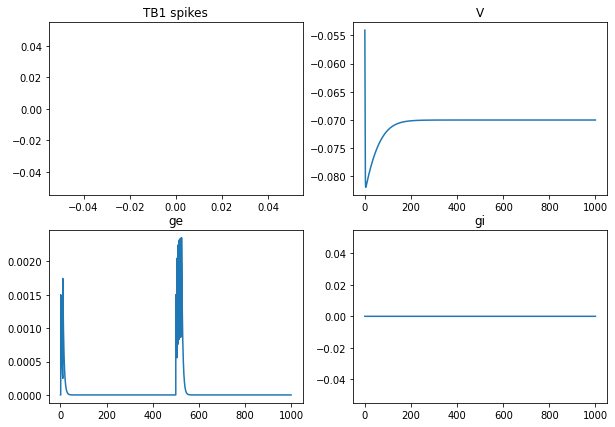

In [23]:
figure(figsize=(10,7))
#plotting spikes of TB 1 cells on raster plot.
subplot(2,2,1)
title('TB1 spikes')
plot(M_TB1_spikes.t/ms, M_TB1_spikes.i, '.k')

#observation_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
observation_list = [0]

#plotting voltage on TB1 cells
subplot(2,2,2)
title('V')
for i in observation_list:
    plot(MV.t/ms, MV.V[i])

subplot(2,2,3)
title('ge')
for i in observation_list:
    #plot(Mge.times / ms, Mge[i] / mV)
#    plot(Mge.t/ms, Mge.ge[i])

subplot(2,2,4)
title('gi')
for i in observation_list:
    #plot(Mge.times / ms, Mgi[i] / mV)
#    plot(Mge.t/ms, Mgi.gi[i])

show()